Fase 2 - Análise de Dados de Jogos da Steam

In [1]:
import sys
import os

# Adiciona o diretório raiz do projeto ao PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src import DataLoader

# Importando bibliotecas

In [2]:
import pandas as pd

# Carregando dados

In [3]:
loader = DataLoader('../data/steam_games.csv')
loader.load_data()
games = loader.get_games()

print(f"Total de jogos carregados: {len(games)}")

Total de jogos carregados: 72934


# Convertendo para DataFrame para análises com pandas

In [4]:
df = pd.DataFrame(games)

In [5]:
# Visualizar as primeiras 5 linhas
print(df.head())

     AppID                   Name  Release date Estimated owners Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000        0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000        0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000        0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000        0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000        0   

  Required age  Price DLC count  \
0            0  19.99         0   
1            0   0.99         0   
2            0   4.99         0   
3            0   5.99         0   
4            0    0.0         0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a hacker who has arr

In [6]:
# Visualizar as primeiras 5 linhas
print(df.tail())

         AppID                   Name  Release date Estimated owners Peak CCU  \
72929  2388020  Invasion: Family Ties  Apr 29, 2023            0 - 0        0   
72930  2386460                Tree It   May 1, 2023            0 - 0        0   
72931  1701130                   GRAB  Apr 27, 2023            0 - 0        0   
72932  2164690               いのちのないうた  Apr 25, 2023            0 - 0        0   
72933  2309280         Mini Star Cafe  Apr 27, 2023            0 - 0        0   

      Required age  Price DLC count  \
72929            0    0.0         0   
72930            0   3.99         0   
72931            0    0.0         0   
72932            0    0.0         0   
72933            0  10.79         0   

                                          About the game  \
72929  Rick travels to Indiana to visit his mother, b...   
72930  Tree it is a low poly 3d tree generator for th...   
72931  GRAB is a VR multiplayer parkour game. Climb, ...   
72932  ▼概要 ゲームアルバム「いのちのないうた」はストーリーを主軸に

In [7]:
# Verificar as estatísticas descritivas
print(df.describe())

          AppID                                           Name Release date  \
count     72934                                          72934        72934   
unique    72934                                          72373         4198   
top     2309280  Shadow of the Tomb Raider: Definitive Edition  Dec 1, 2022   
freq          1                                             20           97   

       Estimated owners Peak CCU Required age  Price DLC count About the game  \
count             72934    72934        72934  72934     72934          72934   
unique               14     1320           17    525        94          70057   
top           0 - 20000        0            0    0.0         0                  
freq              48081    52943        71403  12680     61987           2532   

       Supported languages  ... Average playtime two weeks  \
count                72934  ...                      72934   
unique                9809  ...                        742   
top         

# Convertendo colunas relevantes para os tipos corretos

In [8]:
# Convertendo colunas relevantes para os tipos corretos
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df['Metacritic score'] = pd.to_numeric(df['Metacritic score'], errors='coerce')

## Pergunta 1: Dez Jogos Mais Bem Avaliados

In [9]:
top10_games = df.sort_values(by=['Metacritic score', 'Release date'], ascending=[False, True]).head(10)
print(top10_games[['Name', 'Metacritic score', 'Release date']])

                                Name  Metacritic score Release date
45752  Disco Elysium - The Final Cut                97   2019-10-15
64935                Persona 5 Royal                97   2022-10-20
49557                      Half-Life                96   1998-11-08
36775                    Half-Life 2                96   2004-11-16
32406                      BioShock™                96   2007-08-21
57205             Grand Theft Auto V                96   2015-04-13
28170                       Portal 2                95   2011-04-18
28484                       Portal 2                95   2011-04-18
12746   Sid Meier's Civilization® IV                94   2006-10-25
55150   Sid Meier's Civilization® IV                94   2006-10-25


## Pergunta 2: Para jogos de role-playing, qual o número médio e máximo de: DLCs, avaliações positivas, avaliações negativas e materiais de demonstração (número de capturas de tela e filmes, somados)?

In [10]:
# Filtrando os jogos do gênero 'role-playing'
df_rpg = df.loc[df['Genres'].str.contains('RPG', case=False, na=False)].copy()


# Exibindo o número total de jogos do gênero 'RPG'
total_rpg_games = len(df_rpg)
print(f"Total de jogos do gênero RPG: {total_rpg_games}")

# Tratando os valores não numéricos e ausentes nas colunas numéricas
numeric_columns = ['DLC count', 'Positive', 'Negative', 'Screenshots', 'Movies']

for column in numeric_columns:
    df_rpg.loc[:, column] = pd.to_numeric(df_rpg[column], errors='coerce').fillna(0)

# Calculando estatísticas
if total_rpg_games > 0:
    mean_dlc = df_rpg['DLC count'].mean()
    max_dlc = df_rpg['DLC count'].max()
    mean_positive_reviews = df_rpg['Positive'].mean()
    max_positive_reviews = df_rpg['Positive'].max()
    mean_negative_reviews = df_rpg['Negative'].mean()
    max_negative_reviews = df_rpg['Negative'].max()
    mean_demo_materials = (df_rpg['Screenshots'] + df_rpg['Movies']).mean()
    max_demo_materials = (df_rpg['Screenshots'] + df_rpg['Movies']).max()

    # Exibindo os resultados
    print(f"Número médio de DLCs: {mean_dlc:.2f}")
    print(f"Número máximo de DLCs: {max_dlc}")
    print(f"Número médio de avaliações positivas: {mean_positive_reviews:.2f}")
    print(f"Número máximo de avaliações positivas: {max_positive_reviews}")
    print(f"Número médio de avaliações negativas: {mean_negative_reviews:.2f}")
    print(f"Número máximo de avaliações negativas: {max_negative_reviews}")
    print(f"Número médio de materiais de demonstração (capturas de tela e filmes): {mean_demo_materials:.2f}")
    print(f"Número máximo de materiais de demonstração (capturas de tela e filmes): {max_demo_materials}")
else:
    print("Nenhum jogo do gênero RPG encontrado.")

Total de jogos do gênero RPG: 12296
Número médio de DLCs: 0.95
Número máximo de DLCs: 2366
Número médio de avaliações positivas: 1516.41
Número máximo de avaliações positivas: 964983
Número médio de avaliações negativas: 247.17
Número máximo de avaliações negativas: 129925
Número médio de materiais de demonstração (capturas de tela e filmes): 0.00
Número máximo de materiais de demonstração (capturas de tela e filmes): 0.0


In [11]:
# Visualizando alguns dos primeiros valores de 'Screenshots' e 'Movies'
print("Valores únicos na coluna 'Screenshots':")
print(df_rpg['Screenshots'].unique()[:10])

print("\nValores únicos na coluna 'Movies':")
print(df_rpg['Movies'].unique()[:10])

# Contar a frequência de cada valor para ver se são todos zeros
print("\nContagem de valores na coluna 'Screenshots':")
print(df_rpg['Screenshots'].value_counts())

print("\nContagem de valores na coluna 'Movies':")
print(df_rpg['Movies'].value_counts())


Valores únicos na coluna 'Screenshots':
[0.0]

Valores únicos na coluna 'Movies':
[0.0]

Contagem de valores na coluna 'Screenshots':
Screenshots
0.0    12296
Name: count, dtype: int64

Contagem de valores na coluna 'Movies':
Movies
0.0    12296
Name: count, dtype: int64


## Pergunta 3: Quais são as cinco empresas que mais publicam jogos pagos na plataforma? Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?

In [17]:
# Filtrando jogos pagos
df_paid = df.loc[df['Price'] > 0].copy()

# Calculando o número de jogos pagos por empresa (Publishers)
top_publishers = df_paid['Publishers'].value_counts().head(5)

print("As cinco empresas que mais publicam jogos pagos na plataforma:")
print(top_publishers)

# Converte a coluna 'Positive' para numérica, substituindo valores inválidos por NaN
df_paid.loc[:, 'Positive'] = pd.to_numeric(df_paid['Positive'], errors='coerce')

# Calculando o número médio e mediano de avaliações positivas para os jogos pagos das empresas
mean_positive_reviews = df_paid[df_paid['Publishers'].isin(top_publishers.index)].groupby('Publishers')['Positive'].mean()
median_positive_reviews = df_paid[df_paid['Publishers'].isin(top_publishers.index)].groupby('Publishers')['Positive'].median()

print("\nNúmero médio de avaliações positivas dos jogos pagos das principais empresas:")
print(mean_positive_reviews)
print("\nNúmero mediano de avaliações positivas dos jogos pagos das principais empresas:")
print(median_positive_reviews)

As cinco empresas que mais publicam jogos pagos na plataforma:
Publishers
Big Fish Games    443
8floor            239
                  231
Strategy First    162
Laush Studio      157
Name: count, dtype: int64

Número médio de avaliações positivas dos jogos pagos das principais empresas:
Publishers
                  368.506494
8floor              4.460251
Big Fish Games      7.363431
Laush Studio        19.77707
Strategy First    276.450617
Name: Positive, dtype: object

Número mediano de avaliações positivas dos jogos pagos das principais empresas:
Publishers
                  19.0
8floor             3.0
Big Fish Games     5.0
Laush Studio      12.0
Strategy First    23.0
Name: Positive, dtype: object


## Pergunta 4: O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?

In [23]:
# Convertendo a coluna 'Linux' de string para boolean
df['Linux'] = df['Linux'].map({'True': True, 'False': False})

# Reaplicando o filtro para jogos lançados entre 2018 e 2022
df_period = df[(df['Release date'].dt.year >= 2018) & (df['Release date'].dt.year <= 2022)]

# Confirmando quantidade de jogos após filtragem por data
print(f"Jogos lançados entre 2018 e 2022: {len(df_period)}")

# Filtrando jogos que suportam Linux
df_linux = df_period[df_period['Linux'] == True]

# Contando o número de jogos com suporte a Linux por ano
linux_games_count = df_linux.groupby(df_linux['Release date'].dt.year).size()

print("Número de jogos que suportam Linux por ano (2018-2022):")
print(linux_games_count)


Jogos lançados entre 2018 e 2022: 51137
Número de jogos que suportam Linux por ano (2018-2022):
Release date
2018    1187
2019     922
2020    1082
2021    1210
2022    1311
dtype: int64


## Pergunta 5: Qual é a relação entre o preço dos jogos e o número de avaliações positivas que eles recebem?

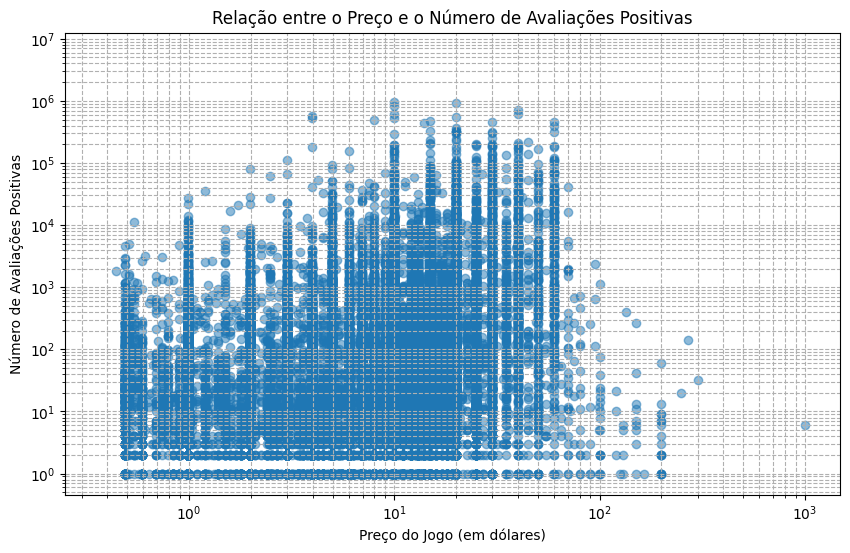

A correlação entre o preço e o número de avaliações positivas é: 0.03


In [28]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'Price' e 'Positive' para numérico
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Positive'] = pd.to_numeric(df['Positive'], errors='coerce')

# Removendo jogos com preços ou avaliações positivas nulos
df = df.dropna(subset=['Price', 'Positive'])

# Plotar a relação entre o preço e o número de avaliações positivas
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Positive'], alpha=0.5)
plt.title('Relação entre o Preço e o Número de Avaliações Positivas')
plt.xlabel('Preço do Jogo (em dólares)')
plt.ylabel('Número de Avaliações Positivas')
plt.xscale('log')  # Usando escala logarítmica para o preço para melhor visualização
plt.yscale('log')  
plt.grid(True, which="both", ls="--")
plt.show()

# Calculando a correlação entre o preço e o número de avaliações positivas
correlation = df[['Price', 'Positive']].corr().iloc[0, 1]

print(f"A correlação entre o preço e o número de avaliações positivas é: {correlation:.2f}")